In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

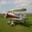

In [3]:
import PIL
PIL.Image.open('C:/Users/KIIT/Documents/ML/real-synthetic-classification/train/REAL/0009.jpg')

CREATING X_TRAIN AND Y_TRAIN

In [4]:
train_pathfake=[]
base_f='C:/Users/KIIT/Documents/ML/real-synthetic-classification/train/FAKE/'

for i in range(1000,6000):
    a="{}{}.jpg".format(base_f,i)
    train_pathfake.append(a)
for i in range(1000,6000):
    for j in range(2,11):
        b="{}{} ({}).jpg".format(base_f,i,j)
        train_pathfake.append(b)
len(train_pathfake)
    
    

50000

In [5]:
df_trainf=pd.DataFrame(train_pathfake)
df_trainf.columns =['path']
df_trainf['label']=0
df_trainf.head()

,path,label
0,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
1,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
2,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
3,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
4,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0


In [6]:
train_pathreal=[]
base_r='C:/Users/KIIT/Documents/ML/real-synthetic-classification/train/REAL/'

for i in range(0,10):
    c = '{}000{}.jpg'.format(base_r, i)
    train_pathreal.append(c)

for i in range(0,10):
    for j in range(2,11):
        d = '{}000{} ({}).jpg'.format(base_r ,i,j)
        train_pathreal.append(d)
for i in range(10,100):
    e = '{}00{}.jpg'.format(base_r, i)
    train_pathreal.append(e)


for i in range(10,100):
    for j in range(2,11):
        f = '{}00{} ({}).jpg'.format(base_r, i,j)
        train_pathreal.append(f)

for i in range(100,1000):
    g = '{}0{}.jpg'.format(base_r, i)
    train_pathreal.append(g)

for i in range(100,1000):
    for j in range(2,11):
        h = '{}0{} ({}).jpg'.format(base_r, i,j)
        train_pathreal.append(h)
    
for i in range(1000,5000):
    k = '{}{}.jpg'.format(base_r, i)
    train_pathreal.append(k)

for i in range(1000,5000):
    for j in range(2,11):
        l = '{}{} ({}).jpg'.format(base_r, i,j)
        train_pathreal.append(l)

len(train_pathreal)

50000

In [7]:
df_trainr=pd.DataFrame(train_pathreal)
df_trainr.columns =['path']
df_trainr['label'] = 1
df_trainr.head()


,path,label
0,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
1,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
2,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
3,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
4,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1


In [15]:
df_train=pd.concat((df_trainf,df_trainr),axis=0)
df_train = df_train.sample(frac=1).reset_index(drop=True) #shuffling 
df_train.head(5)

,path,label
0,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
1,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
2,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
3,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
4,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1


In [16]:
image_df = []

for image_path in df_train['path']:
    img = cv2.imread(image_path)
    if img is not None:
        image_df.append(img)
for image in image_df:
    # Convert the image to float and normalize the pixel values
    image = image.astype(float) / 255.0


In [17]:
len(image_df)

100000

In [18]:
x_train = np.array(image_df)
y_train = df_train['label']


CREATING X_TEST AND Y_TEST

In [19]:
test_pathfake=[]
base_ft='C:/Users/KIIT/Documents/ML/real-synthetic-classification/test/FAKE/'
for i in range(0,1000):
    m = '{}{}.jpg'.format(base_ft, i)
    test_pathfake.append(m)
    
for i in range(0,1000):
    for j in range(2,11):
        n = '{}{} ({}).jpg'.format(base_ft, i, j)
        test_pathfake.append(n)
len(test_pathfake)

10000

In [20]:
df_testfake = pd.DataFrame(test_pathfake)
df_testfake.columns = ['path']
df_testfake['label'] = 0
df_testfake.head()

,path,label
0,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
1,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
2,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
3,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
4,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0


In [21]:
test_path_real =[]

base_4 = 'C:/Users/KIIT/Documents/ML/real-synthetic-classification/test/REAL/'

for i in range(0,10):
    o = '{}000{}.jpg'.format(base_4, i)
    test_path_real.append(o)

for i in range(0,10):
    for j in range(2,11):
        p = '{}000{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(p)
        
for i in range(10,100):
    q = '{}00{}.jpg'.format(base_4, i)
    test_path_real.append(q)

for i in range(10,100):
    for j in range(2,11):
        r = '{}00{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(r)

for i in range(100,1000):
    s = '{}0{}.jpg'.format(base_4, i)
    test_path_real.append(s)
    
for i in range(100,1000):
    for j in range(2,11):
        t = '{}0{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(t)
len(test_path_real)

10000

In [22]:
df_test_real = pd.DataFrame(test_path_real)
df_test_real.columns = ['path']
df_test_real['label'] = 1
df_test_real.head()


,path,label
0,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
1,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
2,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
3,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
4,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1


In [23]:
df_test = pd.concat((df_testfake, df_test_real), axis = 0 )
print(df_test.shape)
df_test = df_test.sample(frac=1).reset_index(drop=True)#shuffling 
df_test.head()

(20000, 2)


,path,label
0,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
1,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
2,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1
3,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,0
4,C:/Users/KIIT/Documents/ML/real-synthetic-clas...,1


In [24]:
image_ds = []
for image in df_test['path']:
    imge = cv2.imread(image)
    resize = cv2.resize(imge,(32,32))
    image_ds.append(resize)
image_arry = np.array(image_ds)
x_test = image_arry/255

In [25]:
y_test = df_test['label']

In [26]:
from tensorflow.keras import layers


In [30]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    # Plot accuracy
    fig = plt.figure(figsize=(10, 9))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='accuracy')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_accuracy')
    plt.title('Train Accuracy vs. Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot loss function
    
    fig = plt.figure(figsize=(10, 9))
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
    plt.title('Train Loss vs. Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [27]:
model = keras.Sequential([
    layers.Conv2D(filters = 64 , kernel_size = (3,3),activation = 'tanh',input_shape= (32,32,3), padding='same'),
    layers.Conv2D(filters = 64 , kernel_size = (3,3),activation = 'tanh', padding='same'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 32 , kernel_size = (3,3),activation = 'tanh', padding='same'),
    layers.Conv2D(filters = 32 , kernel_size = (3,3),activation = 'tanh', padding='same'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 16 , kernel_size = (3,3),activation = 'tanh', padding='same'),
    layers.Conv2D(filters = 16 , kernel_size = (3,3),activation = 'tanh', padding='same'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(8,activation = 'tanh'),
    layers.Dense(4,activation = 'tanh'),
    layers.Dense(2,activation = 'sigmoid'),
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          4

In [28]:
from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
3125/3125 [==============================] - 413s 132ms/step - loss: 0.4610 - accuracy: 0.7862 - val_loss: 0.4472 - val_accuracy: 0.7908
Epoch 2/5
3125/3125 [==============================] - 516s 165ms/step - loss: 0.3606 - accuracy: 0.8447 - val_loss: 0.3760 - val_accuracy: 0.8374
Epoch 3/5
3125/3125 [==============================] - 550s 176ms/step - loss: 0.3183 - accuracy: 0.8673 - val_loss: 0.3802 - val_accuracy: 0.8345
Epoch 4/5
3125/3125 [==============================] - 552s 177ms/step - loss: 0.2953 - accuracy: 0.8766 - val_loss: 0.3440 - val_accuracy: 0.8529
Epoch 5/5
3125/3125 [==============================] - 513s 164ms/step - loss: 0.2771 - accuracy: 0.8857 - val_loss: 0.3301 - val_accuracy: 0.8607


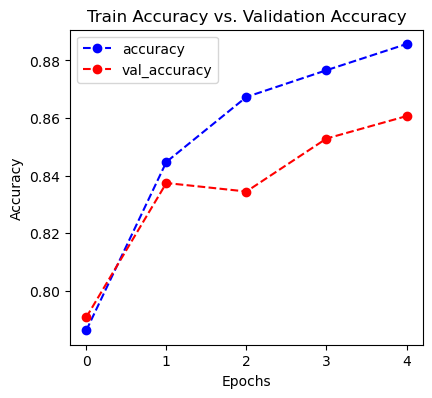

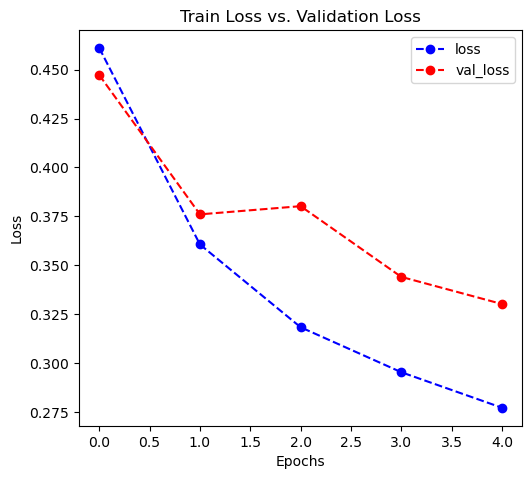

625/625 [==============================] - 12s 19ms/step - loss: 0.3301 - accuracy: 0.8607


[0.3301401138305664, 0.8606500029563904]

In [31]:
plot_accuracy_loss(history)
model.evaluate(x_test,y_test)

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
3125/3125 [==============================] - 474s 152ms/step - loss: 0.2577 - accuracy: 0.8942 - val_loss: 0.3406 - val_accuracy: 0.8548
Epoch 2/5
3125/3125 [==============================] - 514s 164ms/step - loss: 0.2465 - accuracy: 0.9000 - val_loss: 0.3335 - val_accuracy: 0.8588
Epoch 3/5
3125/3125 [==============================] - 516s 165ms/step - loss: 0.2386 - accuracy: 0.9031 - val_loss: 0.3731 - val_accuracy: 0.8407
Epoch 4/5
3125/3125 [==============================] - 539s 172ms/step - loss: 0.2306 - accuracy: 0.9069 - val_loss: 0.3338 - val_accuracy: 0.8619
Epoch 5/5
3125/3125 [==============================] - 619s 198ms/step - loss: 0.2250 - accuracy: 0.9093 - val_loss: 0.3177 - val_accuracy: 0.8677


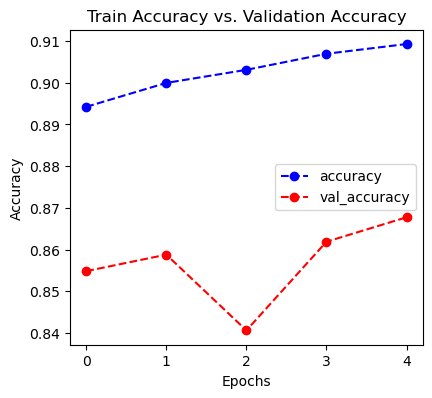

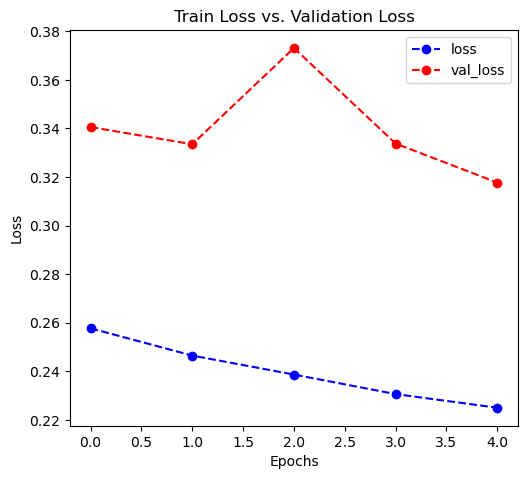

625/625 [==============================] - 12s 19ms/step - loss: 0.3177 - accuracy: 0.8677


[0.3176972270011902, 0.8677499890327454]

In [33]:
plot_accuracy_loss(history)
model.evaluate(x_test,y_test)

Classification Report     : 


               precision    recall  f1-score   support

           0       0.86      0.88      0.87     10000
           1       0.88      0.85      0.87     10000

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



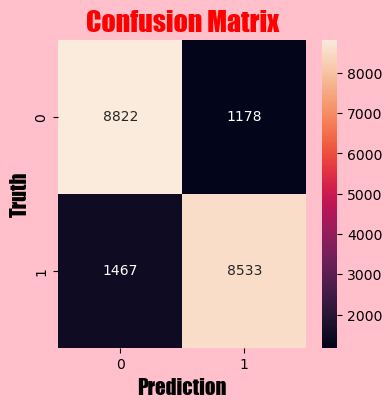

In [35]:
from sklearn.metrics import classification_report

y_pred  = model.predict(x_test)
y_pred_label = [np.argmax(i) for i in y_pred]

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred_label))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred_label)
plt.figure(figsize=(4,4), facecolor= 'pink', edgecolor='brown')

sb.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'black','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'black','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'red','size':20})
plt.show()